In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
data.shape

(569, 32)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Texture_mean,569.0,1.929668e+01,4.301816e+00,9.710000,16.170000,18.870000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
data.isna().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

We have no null parameter

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(569, 32)

We have no duplicated values

In [10]:
data = pd.get_dummies(data,drop_first=True)

In [11]:
data

,id,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


<AxesSubplot:>

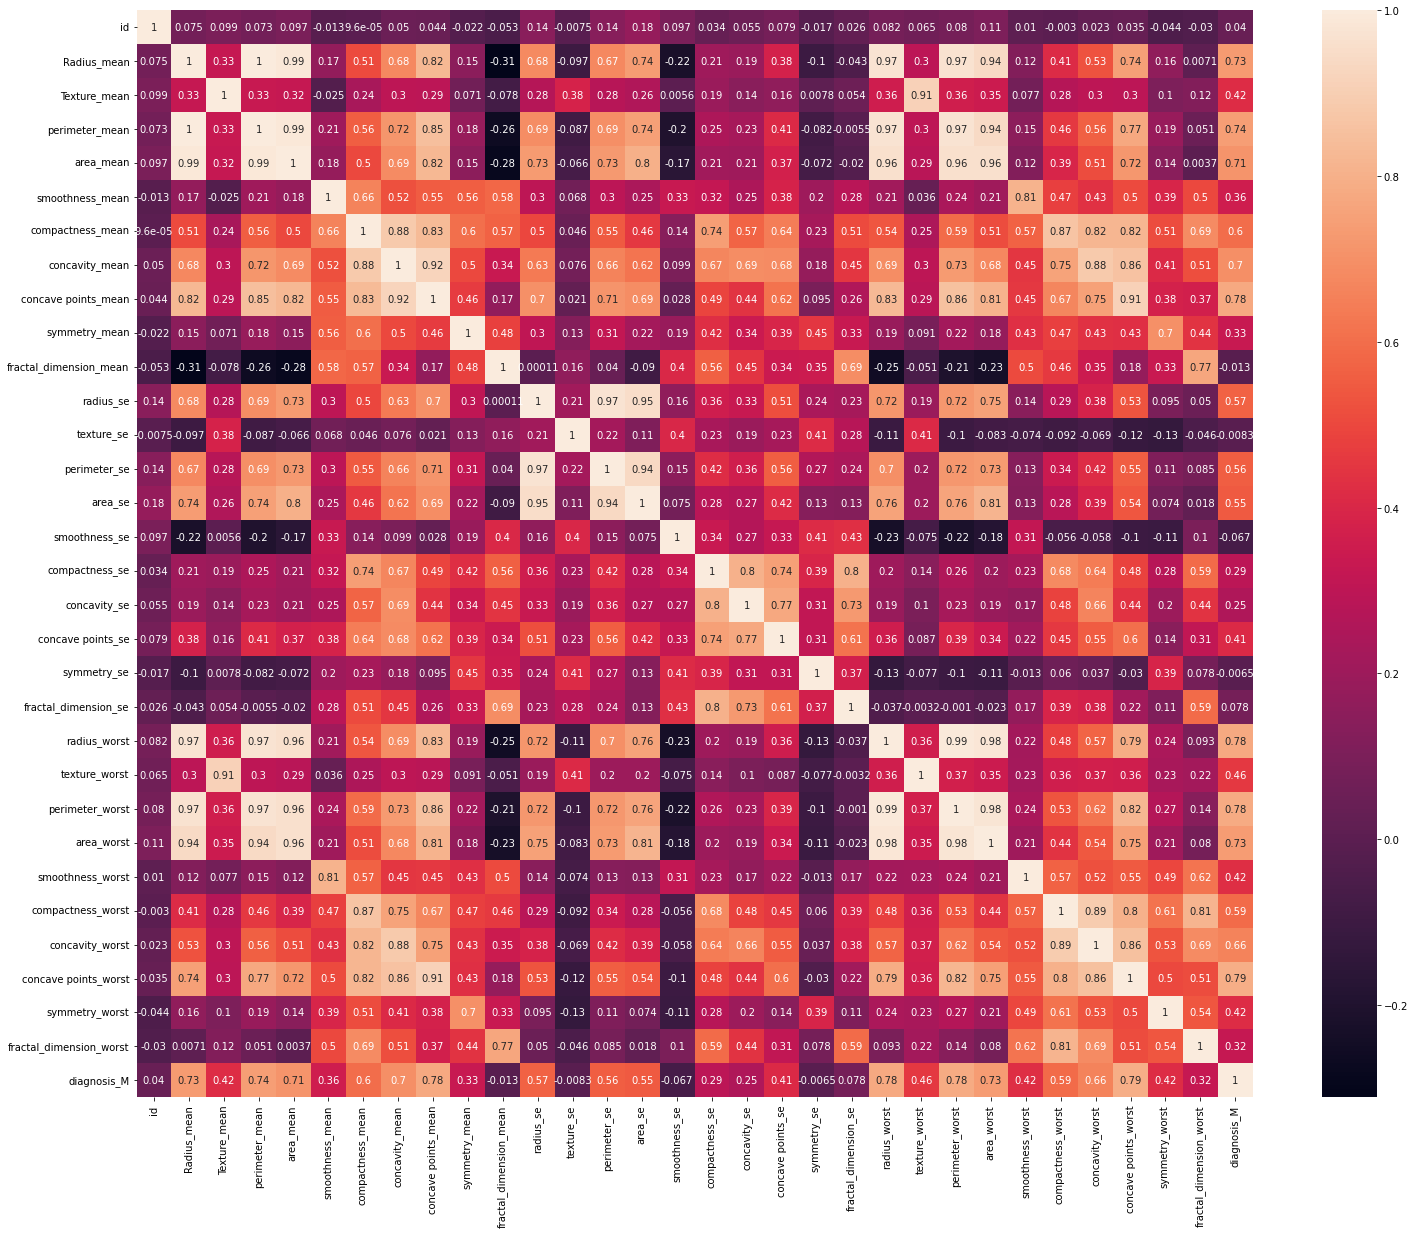

In [12]:
plt.figure(figsize=(25,20))
sns.heatmap(data=data.corr(), annot=True)

perimeters are correlated with radiuses so we can drop one of them.

In [13]:
data.drop(["perimeter_mean","perimeter_se","perimeter_worst"],axis="columns",inplace=True)

area and radius are also correlated so we can drop radius and only feed area to our model.

In [14]:
data.drop(["Radius_mean","radius_se","radius_worst"],axis="columns",inplace=True)

We got rid of some of the features so to see better i will replot the heatmap:

<AxesSubplot:>

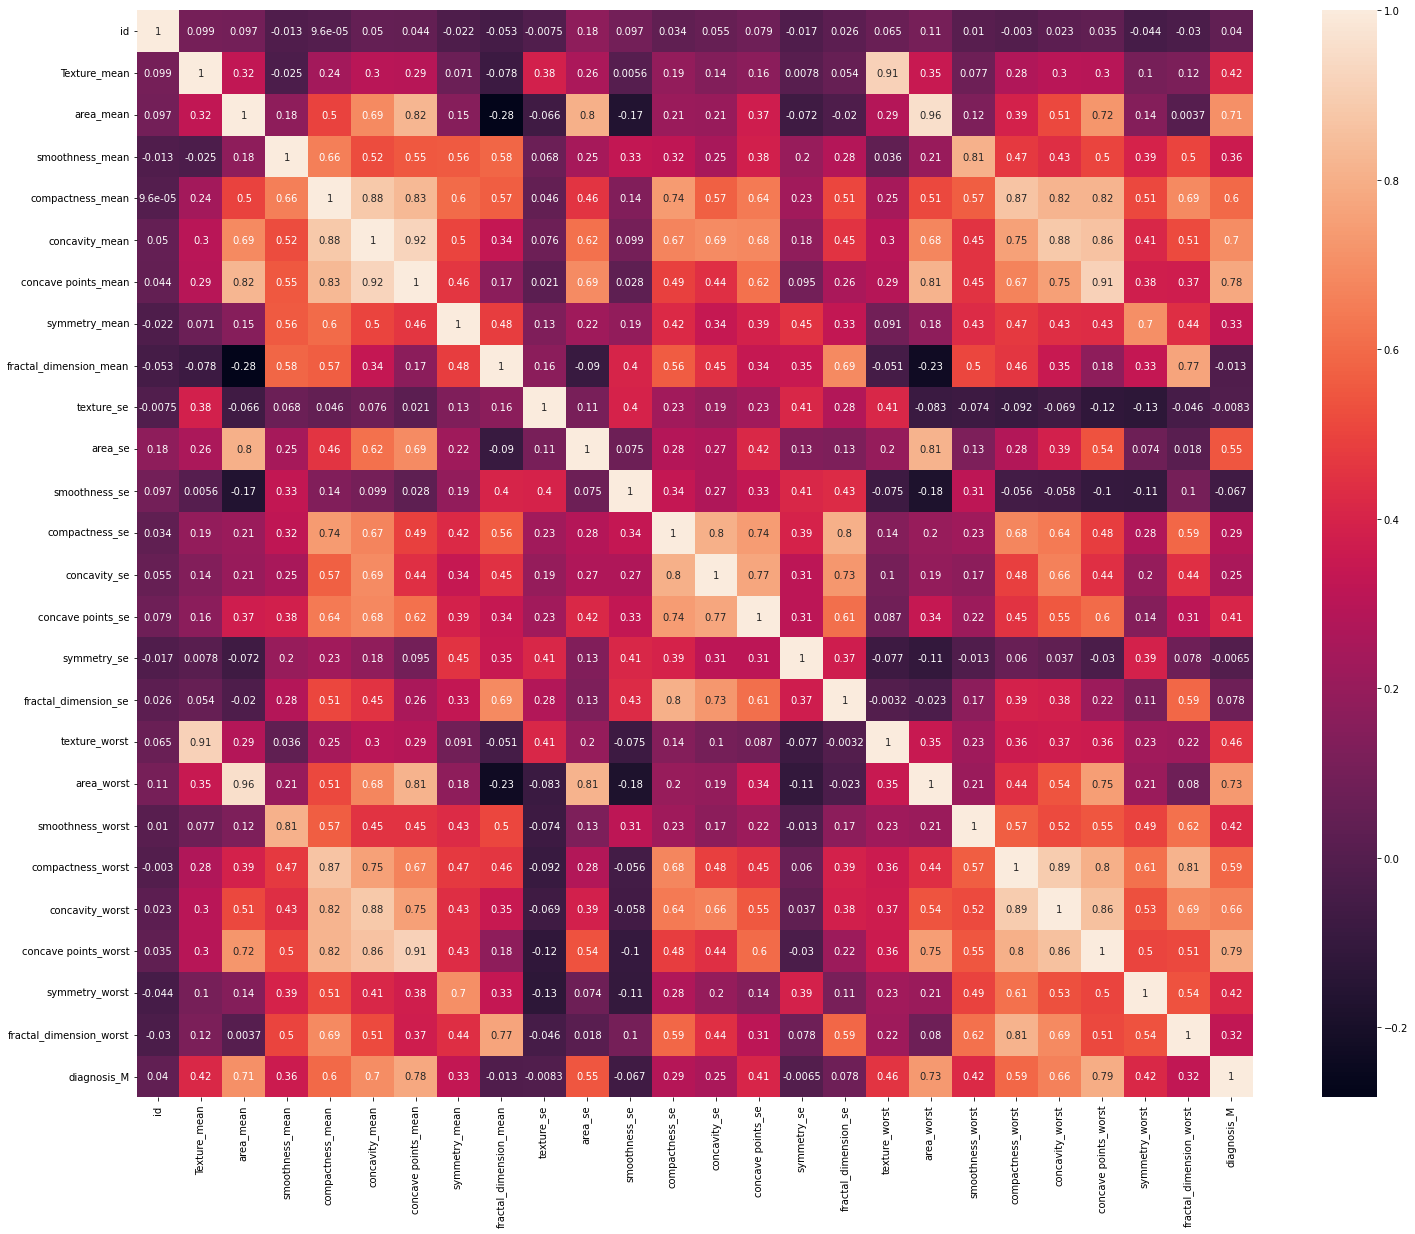

In [15]:
plt.figure(figsize=(25,20))
sns.heatmap(data=data.corr(), annot=True)

symmetry_se, texture_se, smoothness_se , fractal_dimension_se features are almost unrelated to whether cancer is malignant or benign so we will also drop them.

In [16]:
data.drop(["symmetry_se","texture_se","smoothness_se","fractal_dimension_se"],axis="columns",inplace=True)

<AxesSubplot:>

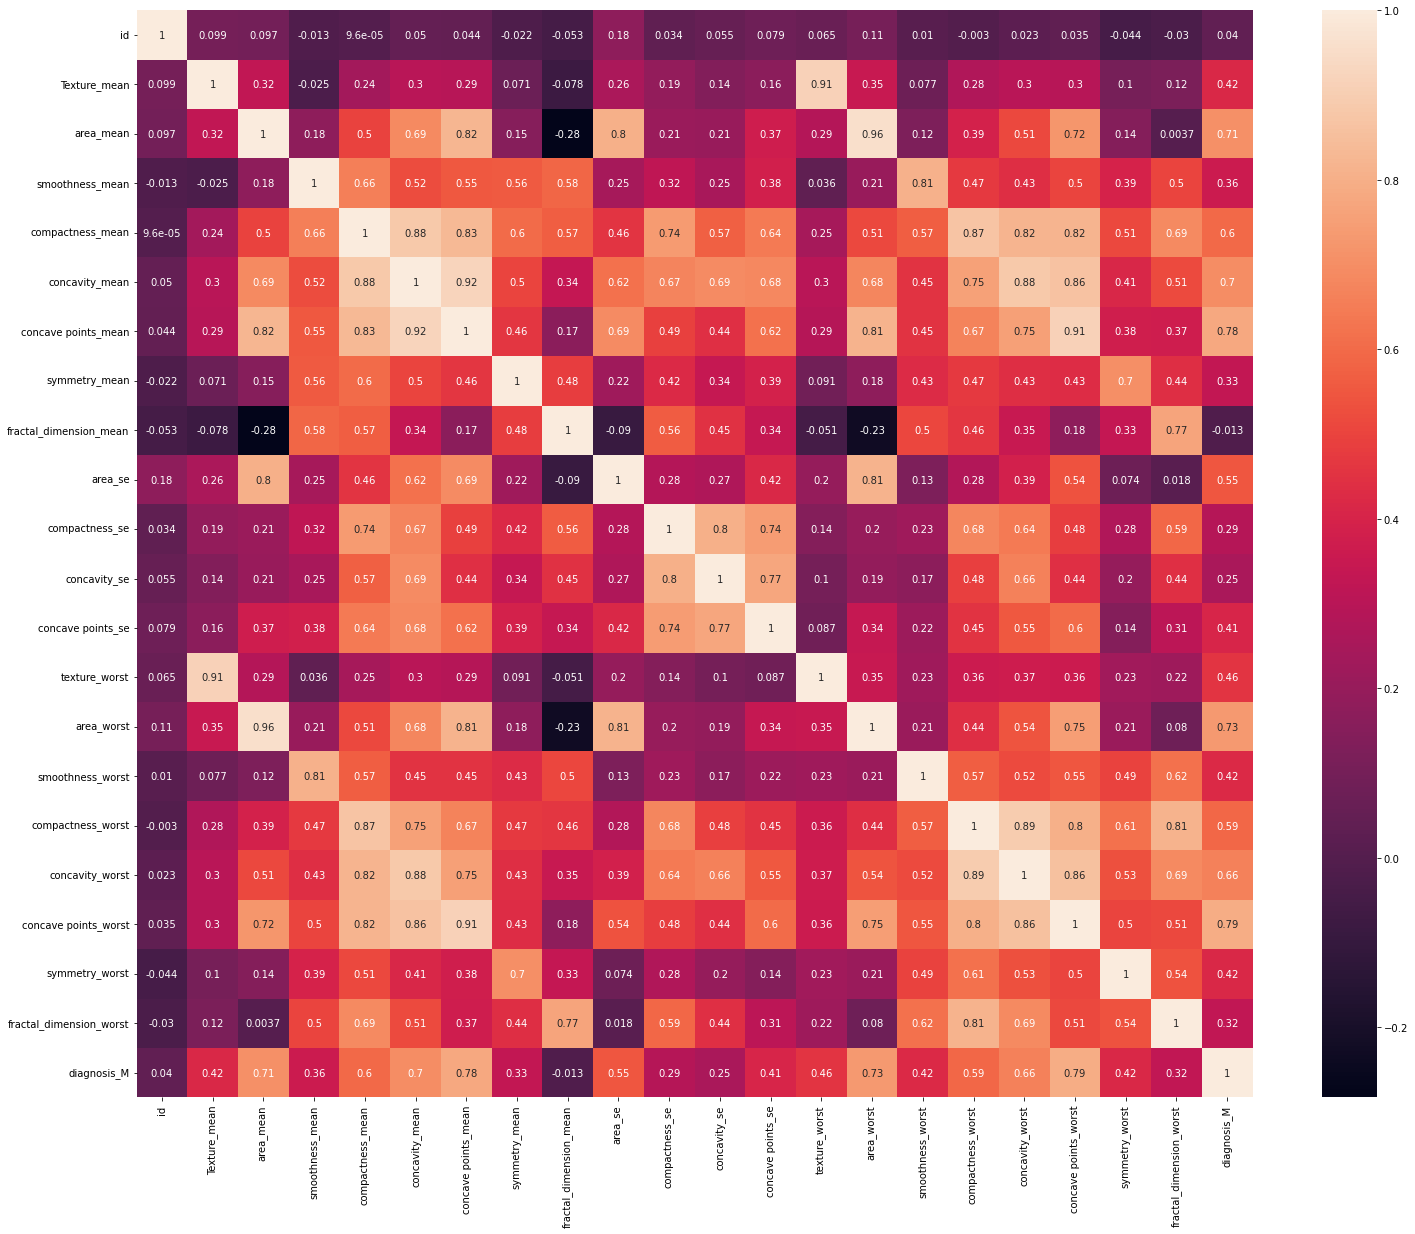

In [17]:
plt.figure(figsize=(25,20))
sns.heatmap(data=data.corr(), annot=True)

fractal_dimension_mean is almost not related to dagnosis so i will drop it too.

In [18]:
data.drop("fractal_dimension_mean",axis="columns",inplace=True)

texture_mean is %96 corr with texture_mean as expected and texture_worst is more corr with the output so i will drop texture_mean

In [19]:
data.drop("Texture_mean",axis="columns",inplace=True)

same goes with area and compactness too, i will drop area_mean and compactness_worst

In [20]:
data.drop(["area_mean","compactness_worst"],axis="columns",inplace=True)

it's also valid for "concave points" but they are affecting the outcome a little bit different than each other so i will keep them.

Finally we have these features:

In [21]:
data.columns.unique()

Index(['id', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_M'],
      dtype='object')

In [22]:
data.head()

,id,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,area_se,compactness_se,concavity_se,concave points_se,texture_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,0.11840,0.27760,0.3001,0.14710,0.2419,153.40,0.04904,0.05373,0.01587,17.33,2019.0,0.1622,0.7119,0.2654,0.4601,0.11890,1
1,842517,0.08474,0.07864,0.0869,0.07017,0.1812,74.08,0.01308,0.01860,0.01340,23.41,1956.0,0.1238,0.2416,0.1860,0.2750,0.08902,1
2,84300903,0.10960,0.15990,0.1974,0.12790,0.2069,94.03,0.04006,0.03832,0.02058,25.53,1709.0,0.1444,0.4504,0.2430,0.3613,0.08758,1
3,84348301,0.14250,0.28390,0.2414,0.10520,0.2597,27.23,0.07458,0.05661,0.01867,26.50,567.7,0.2098,0.6869,0.2575,0.6638,0.17300,1
4,84358402,0.10030,0.13280,0.1980,0.10430,0.1809,94.44,0.02461,0.05688,0.01885,16.67,1575.0,0.1374,0.4000,0.1625,0.2364,0.07678,1


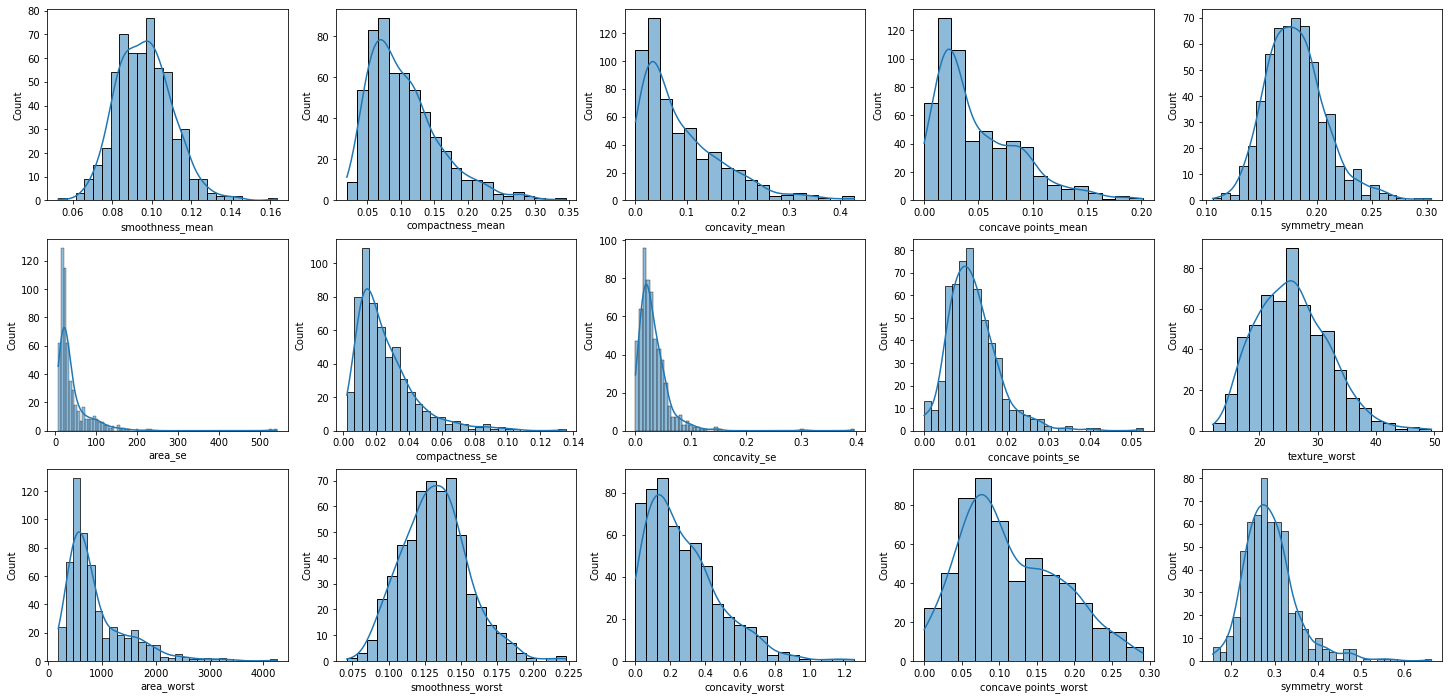

In [23]:
lst_num_column = []
for column in data.columns:
    if (data[column].dtype == np.float64):## only plotting non categorical features.
        lst_num_column.append(column)
#----------------------------------------------------------------------------------------
rows = 3
columns = 5
count = 0
fig, axs = plt.subplots(rows, columns, figsize=(25,12))
for i in range(rows):
    for j in range(columns):
        sns.histplot(ax= axs[i, j], data=data, x=lst_num_column[count], kde=True)
        count += 1

In [24]:
X = data.drop(["id","diagnosis_M"],axis="columns")

In [25]:
Scaler = StandardScaler()

In [26]:
X = Scaler.fit_transform(X)

In [27]:
y = data["diagnosis_M"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [30]:
model = DecisionTreeRegressor()

In [31]:
import time

In [32]:
t0 = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
t1 = time.time() - t0
print('r2 score: ', r2_score(y_test, y_pred))
print('time : ', t1)

r2 score:  0.8137212331741207
time :  0.027825117111206055


In [33]:
model = RandomForestRegressor()
t0 = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
t1 = time.time() - t0
print('r2 score: ', r2_score(y_test, y_pred))
print('time : ', t1)

r2 score:  0.9191519105514546
time :  0.28624606132507324


In [34]:
import pickle

In [35]:
pickle.dump(model, open("BreastCancerModel", 'wb'))

In [36]:
loaded_model = pickle.load(open("BreastCancerModel", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9191519105514546


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
reg = LogisticRegression()

In [39]:
t0 = time.time()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
t1 = time.time() - t0
print('r2 score: ', r2_score(y_test, y_pred))
print('time : ', t1)

r2 score:  0.9379070777247069
time :  0.17417335510253906


In [41]:
pickle.dump(reg, open("BreastCancerReg", 'wb'))